In [11]:
import pickle
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt

from insect_rl.algorithms.evaluation import IAVIEvaluation
from insect_rl.simulation import Simulation
from insect_rl.mdp.utils import grid_math
from insect_rl.plot import plot_grids

from iql.algorithms.iavi import inverse_action_value_iteration
import iql.plot_experiments as plt_exp
INTERCARDINALS = ((1, 0), (0, 1), (-1, 0), (0, -1), (-1,-1), (-1,1), (1,-1), (1,1))

In [12]:
if "snakemake" not in locals().keys():
    experiment="Wystrach2020"
    condition="no-trap"
    wind=0.0
    inputs = [f"../../../irl/{experiment}/{condition}/{wind}/envc.pickle", 
              f"../../../irl/{experiment}/{condition}/transition_probs_wind={wind}.npy",
              f"../../../irl/{experiment}/{condition}/{wind}/results/action_probs.npy",
              f"../../../irl/{experiment}/{condition}/{wind}/results/ground_r.npy",
              f"../../../irl/{experiment}/{condition}/{wind}/results/q.npy",
              f"../../../irl/{experiment}/{condition}/{wind}/results/r.npy",
              f"../../../irl/{experiment}/{condition}/{wind}/results/boltz.npy"
             ]
else:
    inputs = snakemake.input

In [13]:
with open(inputs[0], 'rb') as envc_file:
    envc = pickle.load(envc_file)


transition_probs = np.load(inputs[1])
action_probs = np.load(inputs[2])
ground_r = np.load(inputs[3])

q = np.load(inputs[4])
r = np.load(inputs[5])
boltz = np.load(inputs[6])

In [14]:
nS = envc.width * envc.height
nA = action_probs.shape[1]
V = np.zeros(nS)
for s in range(nS):
    for a in range(nA):
        V[s] += boltz[s][a] * q[s][a]
R = np.zeros(nS)
for s in range(nS):
    for a in range(nA):
        R[s] += boltz[s][a] * r[s][a]

def max_direction(state):
    if all([math.isclose(a,state[0]) for a in state]):
        return np.array((0.0,0.0))
    #print(state)
    max_dir = np.array(INTERCARDINALS[np.argmax(state)])
    return (max_dir/np.linalg.norm(max_dir)) * np.max(state)

np.save("Rnotrap.npy", R)


In [16]:
v2d = V.reshape((60,23))
from scipy.stats import shapiro
stats,p = shapiro(v2d)
print('Statistics=%.3f, p=%.3f' % (stats, p))

Statistics=0.922, p=0.000


In [ ]:
np.save("v2d_notrap.npy", v2d)

TypeError: missing a required argument: 'Y'

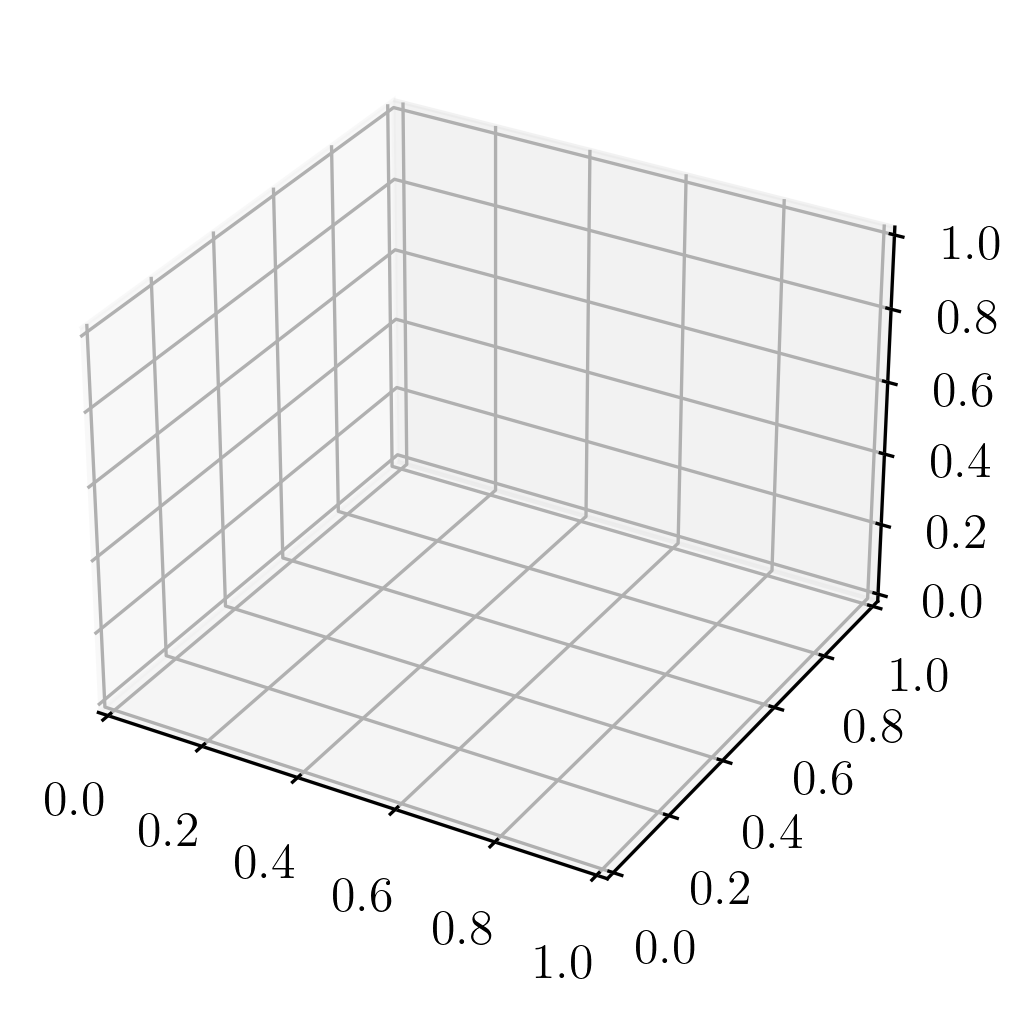

In [19]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(v2d,
                       linewidth=0, antialiased=False)

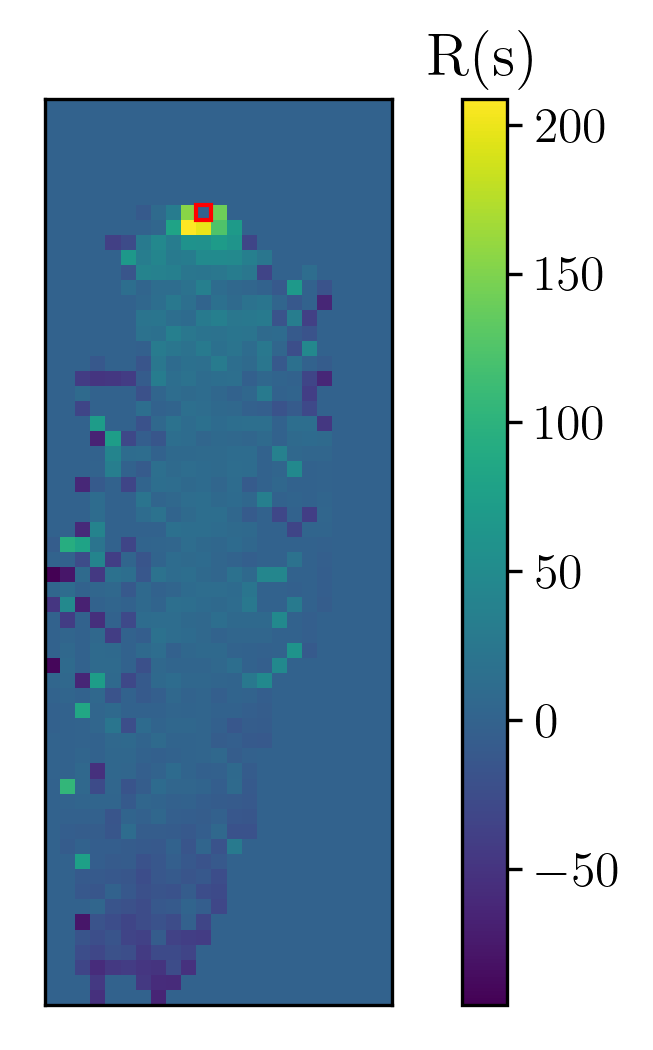

In [5]:
INTERCARDINALS = ((1, 0), (0, 1), (-1, 0), (0, -1), (-1,-1), (-1,1), (1,-1), (1,1))
import matplotlib
import math
from matplotlib.patches import Circle, Rectangle

matplotlib.rcParams["figure.dpi"] = 300


rs = np.apply_along_axis(max_direction, 1, r)
rs_resh = np.reshape(rs, (60,23,2))
U_quiv = rs_resh[:,:,0]
V_quiv = rs_resh[:,:,1]

fig, ax = plt.subplots()

goal = (10.0 -.5,52.0-.5)
#t_exit = envc.trap_exits[0][0]

patches = [
Rectangle(goal, width=1, height=1, edgecolor='red', fill=False),
#Rectangle((t_exit[0]-.5,t_exit[1]-.5), width=2.0, height=1, edgecolor='gray', fill=False)
#Rectangle(envc.start + , width=1, height=1, color='green')    
]
#patches.extend([Rectangle((trap[0]-.5,trap[1]-.5), width=1, height=1, color='lightgray') for trap in envc.traps])
#patches.extend([Rectangle((envc.traps[0][0]-.5,envc.traps[0][1]-.5), width=19, height=1, edgecolor='lightgray', fill=False)])


for patch in patches:
    plt.gca().add_patch(patch, )


#quiv = ax.quiver(U_quiv, V_quiv, pivot='mid')
ax.set_aspect('equal')

plt.imshow(R.reshape((60,23)))
clb = plt.colorbar()
clb.ax.set_title('R(s)')

plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.gca().set_xticks([])

plt.savefig("/home/paulina/Desktop/justr_notrap.png", bbox_inches="tight")

#plt.show()

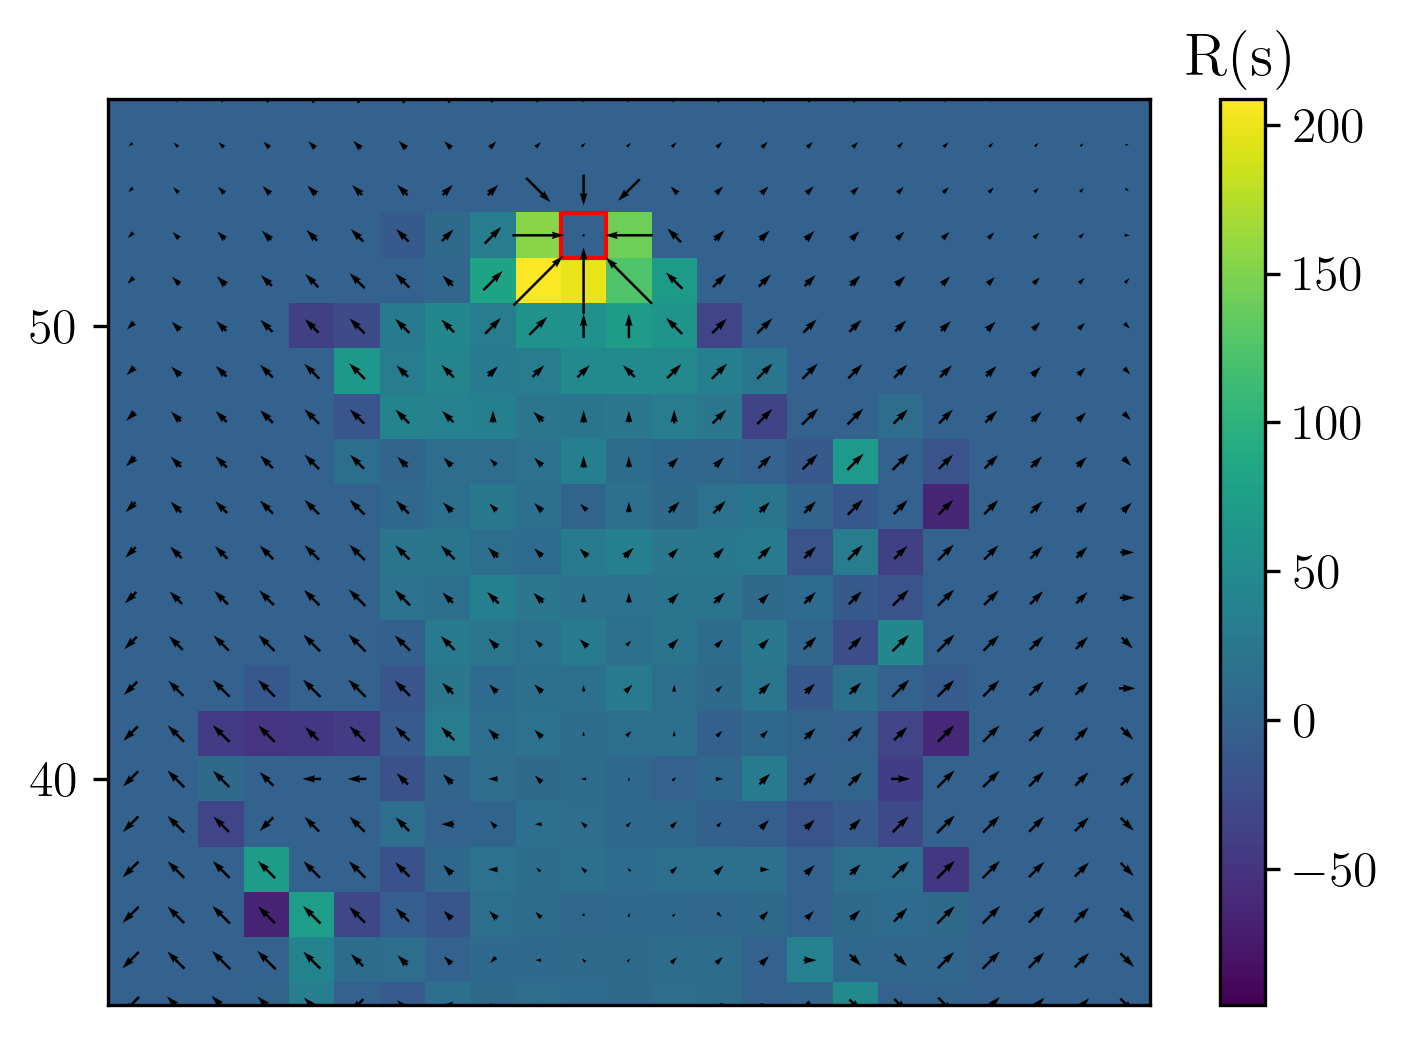

In [6]:
INTERCARDINALS = ((1, 0), (0, 1), (-1, 0), (0, -1), (-1,-1), (-1,1), (1,-1), (1,1))
import matplotlib
import math
from matplotlib.patches import Circle, Rectangle

matplotlib.rcParams["figure.dpi"] = 300


rs = np.apply_along_axis(max_direction, 1, r)
rs_resh = np.reshape(rs, (60,23,2))
U_quiv = rs_resh[:,:,0]
V_quiv = rs_resh[:,:,1]

fig, ax = plt.subplots()

goal = (10.0 -.5,52.0-.5)
#t_exit = envc.trap_exits[0][0]

patches = [
Rectangle(goal, width=1, height=1, edgecolor='red', fill=False),
#Rectangle((t_exit[0]-.5,t_exit[1]-.5), width=2.0, height=1, edgecolor='gray', fill=False)
#Rectangle(envc.start + , width=1, height=1, color='green')    
]
#patches.extend([Rectangle((trap[0]-.5,trap[1]-.5), width=1, height=1, color='lightgray') for trap in envc.traps])
#patches.extend([Rectangle((envc.traps[0][0]-.5,envc.traps[0][1]-.5), width=19, height=1, edgecolor='lightgray', fill=False)])


for patch in patches:
    plt.gca().add_patch(patch, )


quiv = ax.quiver(U_quiv, V_quiv, pivot='mid')
ax.set_aspect('equal')

plt.imshow(R.reshape((60,23)))
clb = plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().set_yticks([40,50])
plt.gca().set_xticks([])
clb.ax.set_title('R(s)')

plt.gca().set_ylim((35,55)) 

plt.savefig("/home/paulina/Desktop/r_notrapgoal.png", bbox_inches="tight")

plt.show()

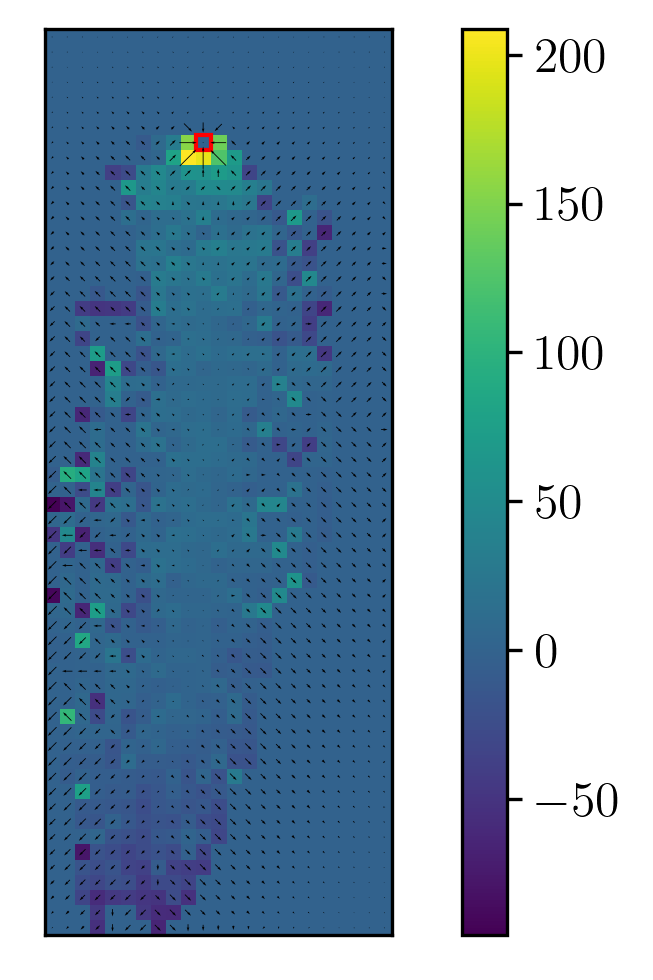

In [8]:
INTERCARDINALS = ((1, 0), (0, 1), (-1, 0), (0, -1), (-1,-1), (-1,1), (1,-1), (1,1))
import matplotlib
import math
from matplotlib.patches import Circle, Rectangle

matplotlib.rcParams["figure.dpi"] = 300


rs = np.apply_along_axis(max_direction, 1, r)
rs_resh = np.reshape(rs, (60,23,2))
U_quiv = rs_resh[:,:,0]
V_quiv = rs_resh[:,:,1]

fig, ax = plt.subplots()

goal = (10.0 -.5,52.0-.5)
#t_exit = envc.trap_exits[0][0]

patches = [
Rectangle(goal, width=1, height=1, edgecolor='red', fill=False),
#Rectangle((t_exit[0]-.5,t_exit[1]-.5), width=2.0, height=1, edgecolor='gray', fill=False)
#Rectangle(envc.start + , width=1, height=1, color='green')    
]
#patches.extend([Rectangle((trap[0]-.5,trap[1]-.5), width=1, height=1, color='lightgray') for trap in envc.traps])
#patches.extend([Rectangle((envc.traps[0][0]-.5,envc.traps[0][1]-.5), width=19, height=1, edgecolor='lightgray', fill=False)])


for patch in patches:
    plt.gca().add_patch(patch, )


quiv = ax.quiver(U_quiv, V_quiv, pivot='mid')
ax.set_aspect('equal')

plt.imshow(R.reshape((60,23)))
plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.gca().set_xticks([])

plt.savefig("/home/paulina/Desktop/r_notrap.png", bbox_inches="tight")

#plt.show()

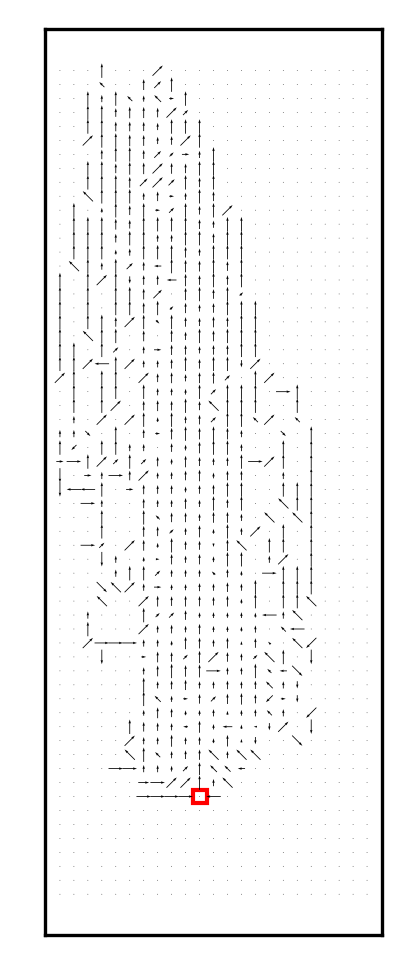

In [7]:
INTERCARDINALS = ((1, 0), (0, 1), (-1, 0), (0, -1), (-1,-1), (-1,1), (1,-1), (1,1))
import matplotlib
import math
from matplotlib.patches import Circle, Rectangle

matplotlib.rcParams["figure.dpi"] = 300


boltzs = np.apply_along_axis(max_direction, 1, boltz)
boltzs_resh = np.reshape(boltzs, (60,23,2))
U_quiv = boltzs_resh[:,:,0]
V_quiv = boltzs_resh[:,:,1]

fig, ax = plt.subplots()

goal = (10.0 -.5,52.0-.5)
#t_exit = envc.trap_exits[0][0]

patches = [
Rectangle(goal, width=1, height=1, edgecolor='red', fill=False),
#Rectangle((t_exit[0]-.5,t_exit[1]-.5), width=2.0, height=1, edgecolor='gray', fill=False)
#Rectangle(envc.start + , width=1, height=1, color='green')    
]
#patches.extend([Rectangle((trap[0]-.5,trap[1]-.5), width=1, height=1, color='lightgray') for trap in envc.traps])
#patches.extend([Rectangle((envc.traps[0][0]-.5,envc.traps[0][1]-.5), width=19, height=1, edgecolor='lightgray', fill=False)])


for patch in patches:
    plt.gca().add_patch(patch, )


quiv = ax.quiver(U_quiv, V_quiv, pivot='mid')
ax.set_aspect('equal')

#plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.gca().set_xticks([])
#plt.gca().set_ylim((35,55)) 


#plt.savefig("/home/paulina/Desktop/r_notrapgoal.png", bbox_inches="tight")

plt.show()

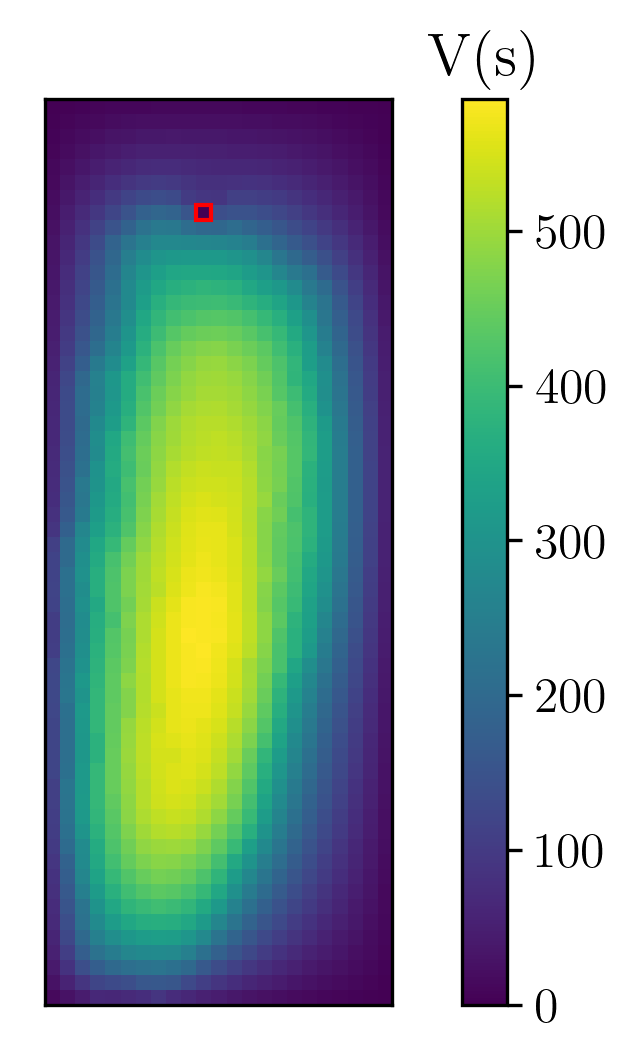

In [9]:
q_grid = q.reshape((60,23,8))
q_grid[0][0]
INTERCARDINALS = ((1, 0), (0, 1), (-1, 0), (0, -1), (-1,-1), (-1,1), (1,-1), (1,1))
import matplotlib
import math
matplotlib.rcParams["figure.dpi"] = 300


qs = np.apply_along_axis(max_direction, 1, q)
qs.shape
qs_resh = np.reshape(qs, (60,23,2))
U_quiv = qs_resh[:,:,0]
V_quiv = qs_resh[:,:,1]

fig, ax = plt.subplots()

goal = (10.0 -.5,52.0-.5)
#t_exit = envc.trap_exits[0][0]
patches = [
Rectangle(goal, width=1, height=1, edgecolor='red', fill=False),
#Rectangle((t_exit[0]-.5,t_exit[1]-.5), width=2.0, height=1, edgecolor='gray', fill=False)
#Rectangle(envc.start + , width=1, height=1, color='green')   
]
#patches.extend([Rectangle((trap[0]-.5,trap[1]-.5), width=1, height=1, color='lightgray') for trap in envc.traps])
#patches.extend([Rectangle((envc.traps[0][0]-.5,envc.traps[0][1]-.5), width=19, height=1, edgecolor='lightgray', fill=False)])


for patch in patches:
    plt.gca().add_patch(patch, )


#plt.colorbar()

#quiv = ax.quiver(U_quiv, V_quiv, pivot='mid')
plt.imshow(V.reshape((60,23)))

ax.set_aspect('equal')
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.gca().set_xticks([])
clb = plt.colorbar()
clb.ax.set_title('V(s)')


#plt.show()
plt.savefig("/home/paulina/Desktop/v_notrap.png", bbox_inches="tight")

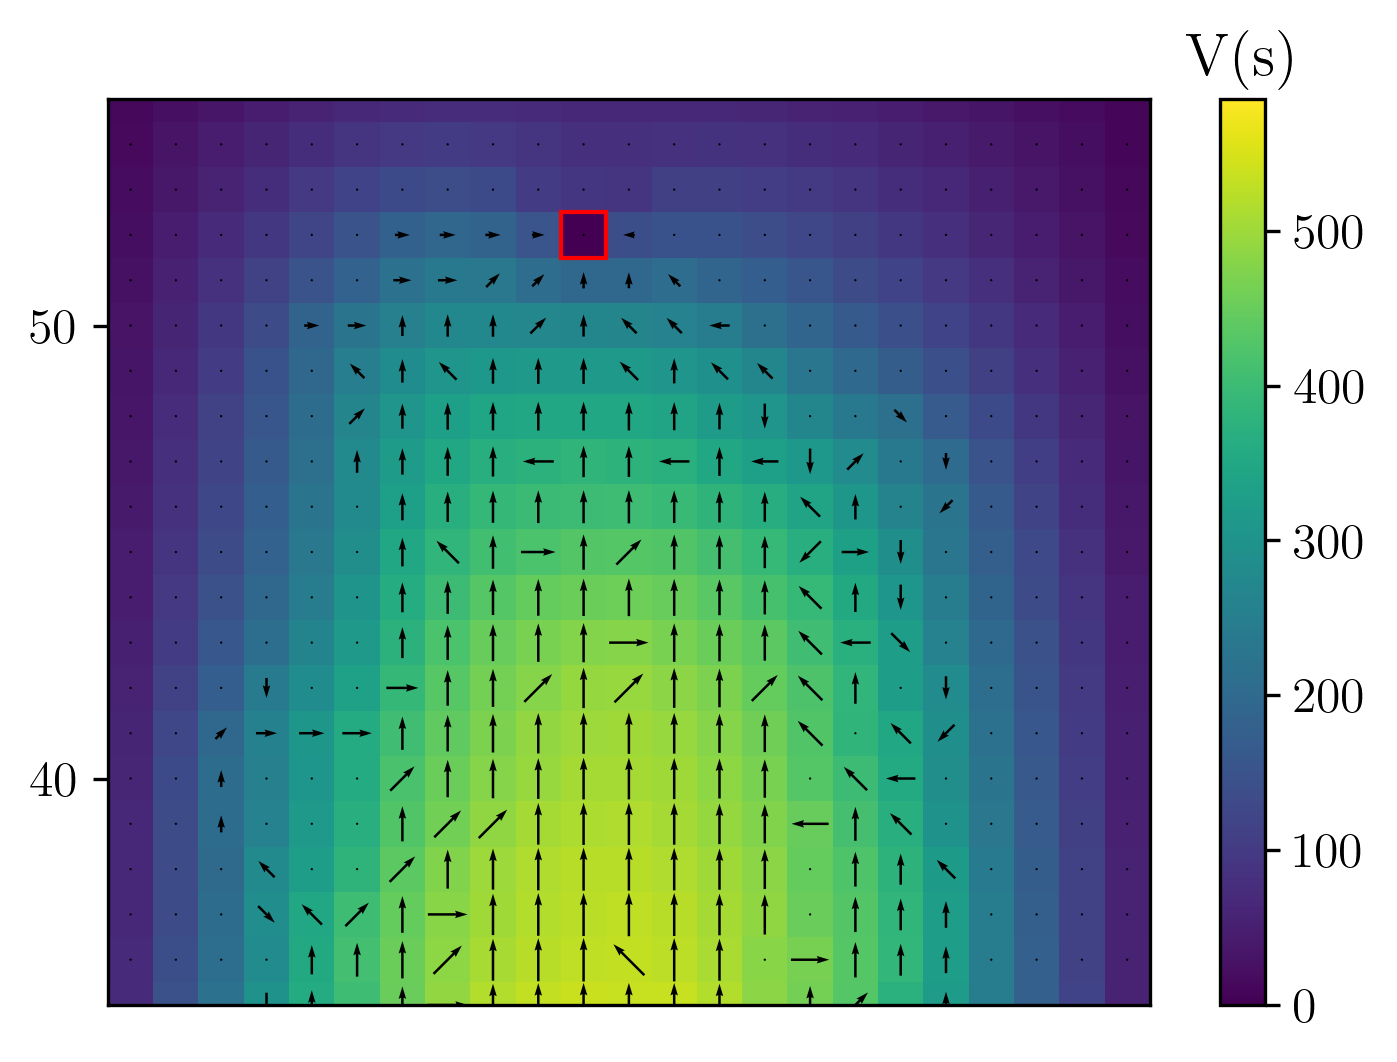

In [10]:
q_grid = q.reshape((60,23,8))
q_grid[0][0]
INTERCARDINALS = ((1, 0), (0, 1), (-1, 0), (0, -1), (-1,-1), (-1,1), (1,-1), (1,1))
import matplotlib
import math
matplotlib.rcParams["figure.dpi"] = 300


qs = np.apply_along_axis(max_direction, 1, q)
qs.shape
qs_resh = np.reshape(qs, (60,23,2))
U_quiv = qs_resh[:,:,0]
V_quiv = qs_resh[:,:,1]

fig, ax = plt.subplots()

goal = (10.0 -.5,52.0-.5)
#t_exit = envc.trap_exits[0][0]
patches = [
Rectangle(goal, width=1, height=1, edgecolor='red', fill=False),
#Rectangle((t_exit[0]-.5,t_exit[1]-.5), width=2.0, height=1, edgecolor='gray', fill=False)
#Rectangle(envc.start + , width=1, height=1, color='green')   
]
#patches.extend([Rectangle((trap[0]-.5,trap[1]-.5), width=1, height=1, color='lightgray') for trap in envc.traps])
#patches.extend([Rectangle((envc.traps[0][0]-.5,envc.traps[0][1]-.5), width=19, height=1, edgecolor='lightgray', fill=False)])


for patch in patches:
    plt.gca().add_patch(patch, )


#plt.colorbar()

quiv = ax.quiver(U_quiv, V_quiv, pivot='mid')
plt.imshow(V.reshape((60,23)))

ax.set_aspect('equal')
plt.gca().invert_yaxis()
plt.gca().set_yticks([40,50])
plt.gca().set_xticks([])
clb = plt.colorbar()
clb.ax.set_title('V(s)')

plt.gca().set_ylim((35,55)) 

#plt.show()
plt.savefig("/home/paulina/Desktop/qv_notrapgoal.png", bbox_inches="tight")

In [11]:
print(r[11])
print(R[8])

print(boltz[7])

print(np.max(r[7]))

[  7.83249033 -44.42985202  -7.99169278  45.48068703  45.48068703
 -62.13951338  45.48068703 -29.71349326]
-2.531308496145357e-13
[9.99992e-07 9.99992e-07 9.99992e-07 9.99992e-07 9.99992e-07 9.99992e-07
 9.99992e-07 9.99993e-01]
75.34445146019807


In [4]:
envc.goals
def centroid(data):
    x, y = zip(*data)
    l = len(x)
    return int(round(sum(x) / l)), int(round(sum(y) / l))
centroid(envc.goals)

(9, 51)

In [5]:
np.allclose(boltz, action_probs, rtol=1.e-5, atol=1.e-6)

True

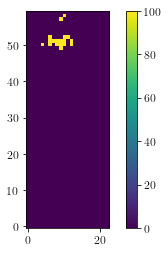

In [6]:
plt.imshow(ground_r.reshape(envc.height, envc.width))
plt.gca().invert_yaxis()
plt.colorbar()

In [9]:
%%capture

v_iavi9 = plt_exp.policy_eval(boltz, ground_r, transition_probs, nS, nA, discount_factor=0.9, theta=0.001)
v_iavi99 = plt_exp.policy_eval(boltz, ground_r, transition_probs, nS, nA, discount_factor=0.99, theta=0.001)

KeyboardInterrupt: 

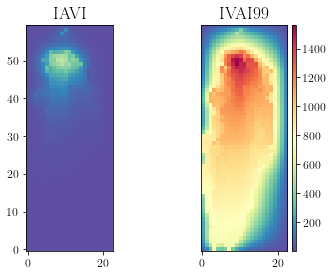

In [8]:
plot_grids(envc.width, envc.height, envc.start, IAVI=v_iavi9, IVAI99=v_iavi99)
plt.show()

In [12]:
V = np.zeros(nS)
for s in range(nS):
    for a in range(nA):
        V[s] += boltz[s][a] * q[s][a]
R = np.zeros(nS)
for s in range(nS):
    for a in range(nA):
        R[s] += boltz[s][a] * r[s][a]

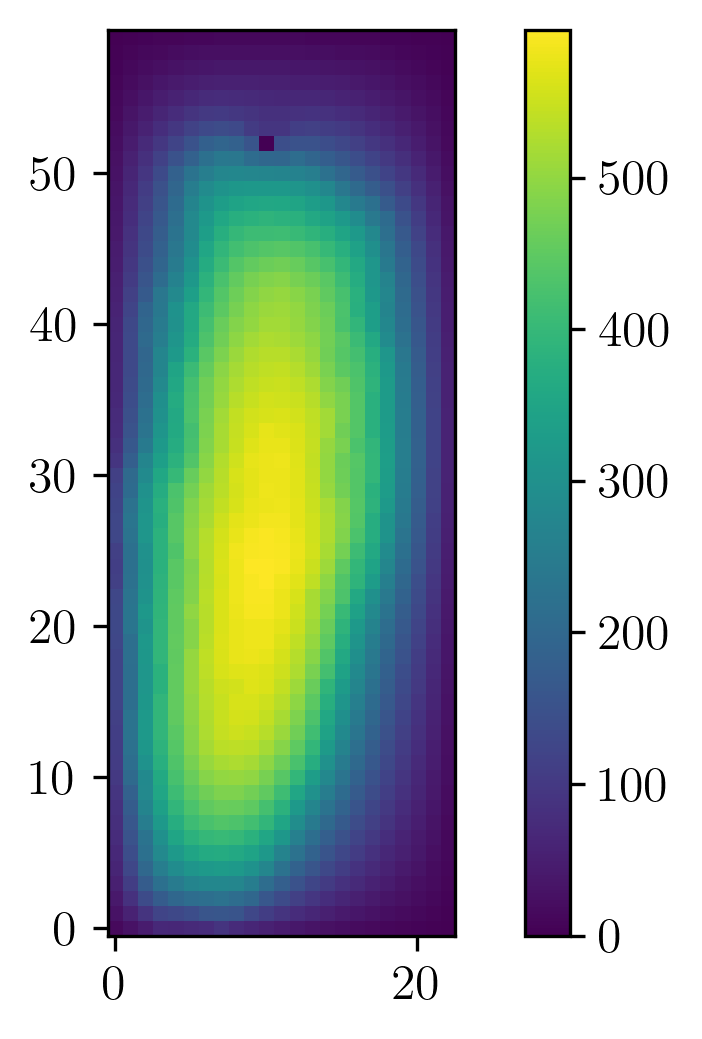

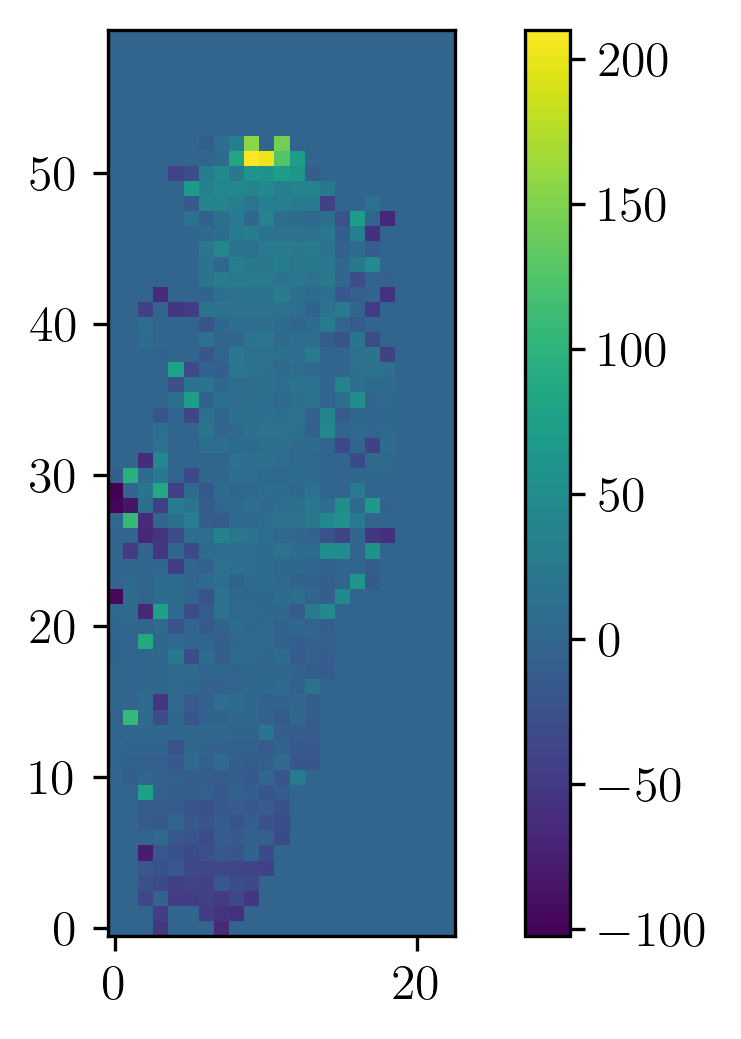

In [13]:
plt.imshow(V.reshape(envc.height, envc.width))
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()
plt.imshow(R.reshape(envc.height, envc.width))
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

In [11]:
%%capture
v_iaviR = plt_exp.policy_eval(boltz, R, transition_probs, nS, nA, discount_factor=0.99, theta=0.001)

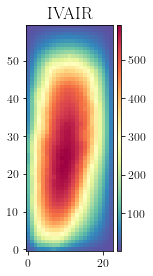

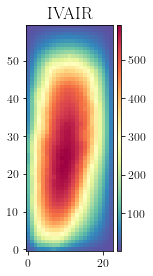

In [12]:
plot_grids(envc.width, envc.height, envc.start, IVAIR=v_iaviR)

In [13]:
%%capture
#p_start_state = (np.bincount(trajectories[:, 0, 0], minlength=env.n_states)/trajectories.shape[0])



# V(s) <- sum[Au: T(s,a,u) * p(s,a) * (r(s) + discount * V(u)) ]

# results of boltzman policy inferred via iavi and the ground truth reward
print("do v_iavi")
#v_iavi = plt_exp.policy_eval(boltz, ground_r, transition_probs, nS, nA, discount_factor=0.99, theta=0.001)

# results of the action probabilities taken from the trajectories
print("do v_true")
v_true = plt_exp.policy_eval(action_probs, ground_r, transition_probs, nS, nA, discount_factor=0.99, theta=0.001) 

# found via value iteration
print("find policy")
b = plt_exp.find_policy(nS, nA, transition_probs, ground_r, discount=0.99, threshold=1e-2)
v_valueit = plt_exp.policy_eval(b, ground_r, transition_probs, nS, nA, discount_factor=0.99, theta=0.001)


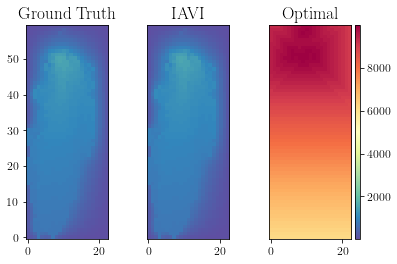

In [14]:
fig = plot_grids(envc.width, envc.height, envc.start, Ground_Truth=v_true, IAVI=v_iavi99, Optimal=v_valueit)
#w = snakemake.wildcards
#label = "condition: " + w['condition'] + ", wind: " + w['wind'] + ", reward: " + "100" + ", trap cost: " + "-100"
plt.subplots_adjust(top=0.85)
#fig.suptitle(label, fontsize=16)


In [ ]:
plt.savefig(snakemake.output[0])